In [21]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette
sns.set_style("whitegrid")
sns.color_palette("Set2")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import os
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
matplotlib.rcParams['pgf.texsystem'] = 'pdflatex'
matplotlib.rcParams.update({'font.size': 18,
    'axes.labelsize': 20,'axes.titlesize': 20, 'figure.titlesize' : 22})
matplotlib.rcParams['text.usetex'] = False
import matplotlib.gridspec as gridspec
from matplotlib.patheffects import withStroke
from collections import defaultdict
# from mpl_toolkits import mplot3d
# from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
print(os.listdir("plaid_csvs"))
print(os.listdir("plaid_csvs/reconstruction"))

['beta_lac.csv', 'hv3aabfy_plddt_per_pos.csv', '.ipynb_checkpoints', 'vqvae_fsq.csv', 'ss.csv', 'human_yeast.csv', 'hv3aabfy_perplexity.csv', 'cath_fsq_240627.csv', 'vqvae_vs_fsq.csv', '2dj696qw_plddt.csv', 'diffusion_cath.csv', 'hv3aabfy_pae.csv', 'peer', 'hv3aabfy_plddt.csv', 'beta_len256.csv', 'reconstruction', 'hv3aabfy_ptm.csv']
['uniref50_tanh_result.csv', '.ipynb_checkpoints', 'organized_pfam.csv', 'oldworkspace_cath.csv', 'pfam_compression.csv', 'cath_tanh_seq512.csv', 'cath_len512.csv', 'cath_tanh_seq256.csv', 'plaid_hourglass_vq.csv', 'oldworkspace_cath_notanh.csv', 'plaid_hourglass_2.csv', 'oldworkspace_cath_vqvae.csv', 'oldworkspace_cath_fsq.csv']


In [3]:
cath_512 = pd.read_csv("plaid_csvs/reconstruction/cath_tanh_seq512.csv", sep=",")
cath_256 = pd.read_csv("plaid_csvs/reconstruction/cath_tanh_seq256.csv", sep=",")

In [4]:
print(cath_512.shape)
cath_512.head(n=10)
cath_512.sort_values(by="cfg.hourglass.downproj_factor")

(8, 150)


,Name,ID,Runtime,cfg.hourglass.downproj_factor,cfg.hourglass.shorten_factor,Created,State,Notes,User,Tags,...,train/seq_acc_epoch,train/seq_acc_step,train/seq_loss_epoch,train/seq_loss_step,trainer/global_step,val/loss,val/recons_loss,val/seq_acc,val/seq_loss,hi
5,cath_tanh_512_512,q3m9fhii,51452,2,1,2024-05-18T04:25:05.000Z,finished,-,lu-amy-al1,NaN,...,0.999995,1.000000,0.000013,2.959498e-07,85859,0.000194,0.000194,0.999999,0.000004,NaN
6,cath_tanh_512_256,5z4iaak9,51448,4,1,2024-05-18T04:25:05.000Z,finished,-,lu-amy-al1,NaN,...,0.999991,1.000000,0.000038,7.959671e-07,90539,0.000419,0.000419,0.999991,0.000024,NaN
2,cath_tanh_512_128,3rs1hxky,34832,8,1,2024-05-18T18:20:57.000Z,crashed,-,lu-amy-al1,NaN,...,0.999965,1.000000,0.000219,4.494358e-07,62499,0.001672,0.001672,0.999939,0.000303,NaN
0,cath_tanh_512_64,2tjrgcde,34809,16,1,2024-05-18T18:21:16.000Z,finished,-,lu-amy-al1,NaN,...,0.999986,1.000000,0.000124,1.573712e-07,63159,0.004070,0.004070,0.999851,0.001221,NaN
1,cath_tanh_512_32,v2cer77t,34817,32,1,2024-05-18T18:21:08.000Z,finished,-,lu-amy-al1,NaN,...,0.999951,0.999298,0.000492,5.236078e-03,63499,0.007151,0.007151,0.999783,0.001627,NaN
3,cath_tanh_512_16,yfel5fnl,51376,64,1,2024-05-18T04:26:33.000Z,finished,-,lu-amy-al1,NaN,...,0.999904,0.999949,0.001134,8.606365e-04,93019,0.010670,0.010670,0.998661,0.013042,NaN
4,cath_tanh_512_8,1hr1x9r5,51436,128,1,2024-05-18T04:26:33.000Z,finished,-,lu-amy-al1,NaN,...,0.991911,0.991966,0.053228,5.133978e-02,92959,0.014585,0.014585,0.990972,0.065546,NaN
7,cath_tanh_512_4,1b64t79h,51465,256,1,2024-05-18T04:24:43.000Z,finished,-,lu-amy-al1,NaN,...,0.921207,0.926144,0.971063,9.470637e-01,94699,0.022036,0.022036,0.914302,1.065786,NaN


In [5]:
print(cath_256.shape)
cath_256.head(n=10)
cath_256.sort_values(by="cfg.hourglass.downproj_factor")

(9, 150)


,Name,ID,Runtime,cfg.hourglass.downproj_factor,cfg.hourglass.shorten_factor,Created,State,Notes,User,Tags,...,train/seq_acc_epoch,train/seq_acc_step,train/seq_loss_epoch,train/seq_loss_step,trainer/global_step,val/loss,val/recons_loss,val/seq_acc,val/seq_loss,hi
8,cath_tanh_256_1024,g8e83omk,26927,1,2,2024-05-14T15:06:18.000Z,crashed,-,lu-amy-al1,NaN,...,0.999992,1.000000,0.000023,1.303237e-07,45599,0.000331,0.000331,0.999999,0.000006,NaN
7,cath_tanh_256_512,7str7fhl,26839,2,2,2024-05-14T15:08:07.000Z,crashed,-,lu-amy-al1,NaN,...,0.999978,1.000000,0.000079,7.768670e-07,47339,0.000786,0.000786,0.999985,0.000043,NaN
6,cath_tanh_256_256,ich20c3q,27053,4,2,2024-05-14T15:04:12.000Z,crashed,-,lu-amy-al1,NaN,...,0.999941,1.000000,0.000338,2.688793e-06,49179,0.001980,0.001980,0.999924,0.000338,NaN
5,cath_tanh_256_128,uhg29zk4,27074,8,2,2024-05-14T15:04:12.000Z,crashed,-,lu-amy-al1,NaN,...,0.999949,0.999686,0.000449,1.888322e-03,49639,0.004110,0.004110,0.999935,0.000439,NaN
4,cath_tanh_256_64,13lltqha,64400,16,2,2024-05-15T00:41:58.000Z,failed,-,lu-amy-al1,NaN,...,0.999957,1.000000,0.000439,6.536948e-08,119999,0.006702,0.006702,0.999837,0.001303,NaN
3,cath_tanh_256_32,fbbrfqzk,92367,32,2,2024-05-15T00:41:55.000Z,finished,-,lu-amy-al1,NaN,...,0.999898,1.000000,0.001384,1.052887e-05,170019,0.011127,0.011127,0.997185,0.032066,NaN
2,cath_tanh_256_16,kyytc8i9,27470,64,2,2024-05-14T14:57:14.000Z,crashed,-,lu-amy-al1,NaN,...,0.997609,0.997990,0.022310,1.764129e-02,50759,0.012491,0.012491,0.996744,0.030346,NaN
1,cath_tanh_256_8,mm9fe6x9,11459,128,2,2024-05-16T20:44:38.000Z,crashed,-,lu-amy-al1,NaN,...,0.968697,0.967503,0.319703,3.307589e-01,21759,0.018588,0.018588,0.966109,0.337371,NaN
0,cath_tanh_256_4,8ebs7j9h,92366,256,2,2024-05-15T00:41:55.000Z,finished,-,lu-amy-al1,NaN,...,0.522836,0.562304,3.502690,3.519761e+00,171119,0.025043,0.025043,0.529034,3.533406,NaN


In [6]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

/tmp/ipykernel_88393/108613848.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtick_labels, rotation=45)
/tmp/ipykernel_88393/108613848.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtick_labels, rotation=45)


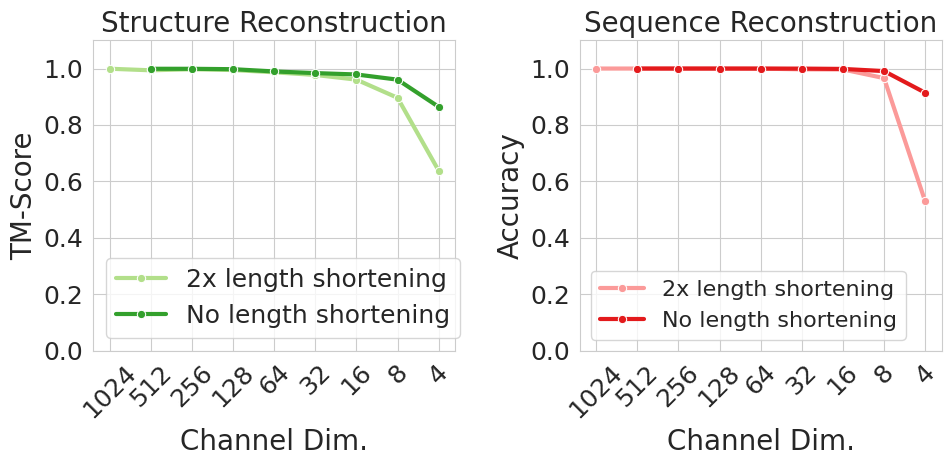

In [45]:
%matplotlib inline

xticks = [1, 2, 4, 8, 16, 32, 64, 128, 256]  # plot by compression dimension
xtick_labels = [1024, 512, 256, 128, 64, 32, 16, 8, 4] # but label by channel width

fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.color_palette("Paired")

### TMScore
sns.lineplot(data=cath_256, x="cfg.hourglass.downproj_factor", y='structure_reconstruction/tmscore_median', marker="o", linewidth=3, label="2x length shortening", ax=axs[0], c=sns.color_palette("Paired")[2])
sns.lineplot(data=cath_512, x="cfg.hourglass.downproj_factor", y='structure_reconstruction/tmscore_median', marker="o", linewidth=3, label="No length shortening", ax=axs[0], c=sns.color_palette("Paired")[3])
axs[0].set_ylabel("TM-Score")
axs[0].set_xlabel("Channel Dim.")
axs[0].set_title("Structure Reconstruction")


### Sequence recovery
sns.lineplot(data=cath_256, x="cfg.hourglass.downproj_factor", y='val/seq_acc', label="2x length shortening", marker="o", linewidth=3, ax=axs[1],c=sns.color_palette("Paired")[4])
sns.lineplot(data=cath_512, x="cfg.hourglass.downproj_factor", y='val/seq_acc', label="No length shortening",marker="o", linewidth=3,  ax=axs[1],c=sns.color_palette("Paired")[5])
axs[1].set_ylabel("Accuracy")
axs[1].set_xlabel("Channel Dim.")
axs[1].set_title("Sequence Reconstruction")


# general 
for ax in axs:
    ax.set_xscale("log")
    ax.set_ylim(0, 1.1)
    ax.set_xticklabels(xtick_labels, rotation=45)
    ax.set_xticks(xticks)

plt.tight_layout()
plt.legend(fontsize=16)
plt.show()

/tmp/ipykernel_88393/3643210868.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtick_labels, rotation=45)
/tmp/ipykernel_88393/3643210868.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xtick_labels, rotation=45)


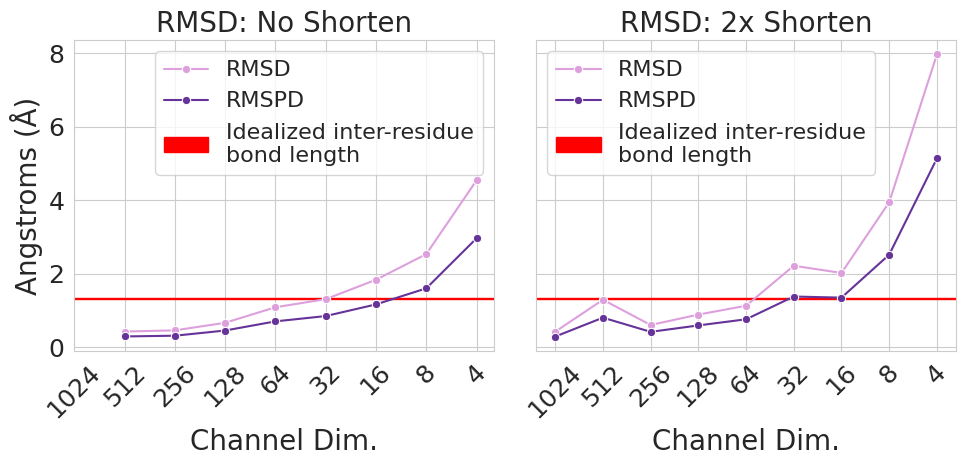

In [44]:
%matplotlib inline

fig, axs = plt.subplots(1,2, figsize=(10,5), sharey=True)
sns.lineplot(ax=axs[0], data=cath_512, x="cfg.hourglass.downproj_factor", c="plum", y='structure_reconstruction/rmsd_mean', marker="o", label="RMSD")
sns.lineplot(ax=axs[0], data=cath_512, x="cfg.hourglass.downproj_factor",  c="rebeccapurple", y='structure_reconstruction/rmspd_mean', marker="o", label="RMSPD")

sns.lineplot(ax=axs[1], data=cath_256, x="cfg.hourglass.downproj_factor", c="plum", y='structure_reconstruction/rmsd_mean', marker="o", label="RMSD")
sns.lineplot(ax=axs[1], data=cath_256, x="cfg.hourglass.downproj_factor", c="rebeccapurple", y='structure_reconstruction/rmspd_mean', marker="o", label="RMSPD")


for ax in axs:
    between_res_bond_length_c_n = [1.329, 1.341]

    # Plot the shaded region
    # ax.fill_between(x, between_res_bond_length_c_nbetween_res_bond_length_c_n, color='gray', alpha=0.3)
    ax.axhspan(between_res_bond_length_c_n[0], between_res_bond_length_c_n[1], label="Idealized inter-residue\nbond length", color="red")

    ax.set_xscale("log")
    xticks = [1, 2, 4, 8, 16, 32, 64, 128, 256]  # plot by compression dimension
    xtick_labels = [1024, 512, 256, 128, 64, 32, 16, 8, 4] # but label by channel width
    ax.set_xticklabels(xtick_labels, rotation=45)
    ax.set_xticks(xticks)
    ax.set_ylabel("Angstroms (Å)")
    ax.set_xlabel("Channel Dim.")
    ax.legend(fontsize=16)
    
axs[0].set_title("RMSD: No Shorten")
axs[1].set_title("RMSD: 2x Shorten")
plt.tight_layout()
plt.show()

/tmp/ipykernel_88393/808252270.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(xtick_labels, rotation=45, fontsize=9)


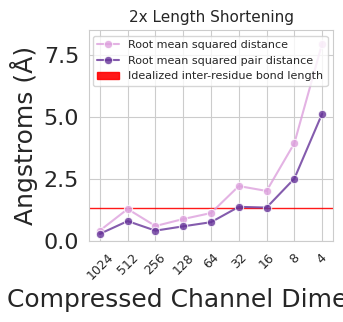

In [9]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(3.5,3.5))
ax = sns.lineplot(data=cath_256, x="cfg.hourglass.downproj_factor", alpha=0.8, c="plum", y='structure_reconstruction/rmsd_mean', marker="o", label="Root mean squared distance")
ax = sns.lineplot(data=cath_256, x="cfg.hourglass.downproj_factor", alpha=0.8, c="rebeccapurple", y='structure_reconstruction/rmspd_mean', marker="o", label="Root mean squared pair distance")

between_res_bond_length_c_n = [1.329, 1.341]

# Plot the shaded region
# ax.fill_between(x, between_res_bond_length_c_nbetween_res_bond_length_c_n, color='gray', alpha=0.3)
plt.axhspan(between_res_bond_length_c_n[0], between_res_bond_length_c_n[1], alpha=0.9, label="Idealized inter-residue bond length", color="red")


_ = ax.set_xscale("log")
xticks = [1, 2, 4, 8, 16, 32, 64, 128, 256]  # plot by compression dimension
xtick_labels = [1024, 512, 256, 128, 64, 32, 16, 8, 4] # but label by channel width
_ = ax.set_xticklabels(xtick_labels, rotation=45, fontsize=9)
_ = ax.set_xticks(xticks)
_ = ax.set_ylabel("Angstroms (Å)")
_ = ax.set_xlabel("Compressed Channel Dimension")

_ = ax.legend(fontsize=8)
_ = ax.set_ylim(0, 8.5)

plt.title("2x Length Shortening", fontsize=11)

plt.tight_layout()
plt.show()

In [10]:
df = pd.read_csv("plaid_csvs/plaid_hourglass_vq.csv", sep=",")
print(df.shape)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'plaid_csvs/plaid_hourglass_vq.csv'

In [ ]:
df.use_quantizer.unique()

In [ ]:
vqvae_df = df[(df.use_quantizer.isna() | (df.use_quantizer == "true"))]

In [ ]:
print(vqvae_df.shape)
vqvae_df.head()